In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from skimage import measure
from classes import *
from functions import *

In [2]:
# wild type attributes (FLO11)
rWT = 0.24
KWT = 30
mWT = 0.9
# mutation_rateWT = 4.104e-06
mutation_rateWT = 0
# mutant attributes (FLO11 knockout)
rMT = 0.24
KMT = 120
mMT = 0.7
# mutation_rateMT = 4.104e-06
mutation_rateMT = 0

traits = CellTraits(rWT, KWT, mWT, mutation_rateWT, rMT, KMT, mMT, mutation_rateMT)

total_days = 1
final_time = total_days * 24
size = [500, 500]
cell_count = 10
frequency = 0.5
colony_no = 1000

In [3]:
print('WT attributes: r = {}, K = {}, m = {}, mutation rate = {}'.format(rWT,KWT,mWT,mutation_rateWT))
print('MT attributes: r = {}, K = {}, m = {}, mutation rate = {}'.format(rMT, KMT, mMT, mutation_rateMT))
print('initial conditions: subcolony size = {}, number of subcolonies = {}, and allele frequency = {}'.format(cell_count, colony_no, frequency))
print('growth time = {} days'.format(total_days))

WT attributes: r = 0.24, K = 30, m = 0.9, mutation rate = 0
MT attributes: r = 0.24, K = 120, m = 0.7, mutation rate = 0
initial conditions: subcolony size = 10, number of subcolonies = 1000, and allele frequency = 0.5
growth time = 1 days


In [4]:
t = time.time()
lattice = run_simulation(final_time, traits, size, cell_count, frequency, colony_no = colony_no)
elapsed = time.time() - t
print('time elapsed: {}'.format(elapsed))

time elapsed: 695.7489559650421


In [5]:
print('total cell count: ' + str(lattice.colony_size()))
print('lattice sites occupied: ' + str(np.count_nonzero(lattice.counts)))
print('colony allele frequency: ' + str(lattice.colony_frequency()))

total cell count: 662013.0
lattice sites occupied: 7847
colony allele frequency: 0.6020423356581581


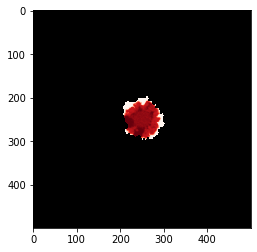

In [6]:
lattice.return_colony_image()

In [43]:
image = lattice.counts
image[np.nonzero(image)] = 1
perimeter1 = measure.perimeter(image, neighborhood=8)
area1 = np.count_nonzero(lattice.counts)

In [45]:
p2a1 = (perimeter1**2)/(4 * math.pi * area1)
p2a1

4.283280990036308

In [36]:
# wild type attributes (FLO11)
rWT = 0.24
KWT = 100
mWT = 0.3
# mutation_rateWT = 4.104e-06
mutation_rateWT = 0
# mutant attributes (FLO11 knockout)
rMT = 0.24
KMT = 100
mMT = 0.3
# mutation_rateMT = 4.104e-06
mutation_rateMT = 0

traits = CellTraits(rWT, KWT, mWT, mutation_rateWT, rMT, KMT, mMT, mutation_rateMT)

total_days = 2
final_time = total_days * 24
size = [500, 500]
cell_count = 10
frequency = 0.5
colony_no = 1000

In [37]:
print('WT attributes: r = {}, K = {}, m = {}, mutation rate = {}'.format(rWT,KWT,mWT,mutation_rateWT))
print('MT attributes: r = {}, K = {}, m = {}, mutation rate = {}'.format(rMT, KMT, mMT, mutation_rateMT))
print('initial conditions: subcolony size = {}, number of subcolonies = {}, and allele frequency = {}'.format(cell_count, colony_no, frequency))
print('growth time = {} days'.format(total_days))

WT attributes: r = 0.24, K = 100, m = 0.3, mutation rate = 0
MT attributes: r = 0.24, K = 100, m = 0.3, mutation rate = 0
initial conditions: subcolony size = 10, number of subcolonies = 1000, and allele frequency = 0.5
growth time = 2 days


In [38]:
lattice2 = run_simulation(final_time, traits, size, cell_count, frequency, colony_no = colony_no)

In [39]:
print('total cell count: ' + str(lattice2.colony_size()))
print('lattice sites occupied: ' + str(np.count_nonzero(lattice2.counts)))
print('colony allele frequency: ' + str(lattice2.colony_frequency()))

total cell count: 412557.0
lattice sites occupied: 4536
colony allele frequency: 0.43696970095029936


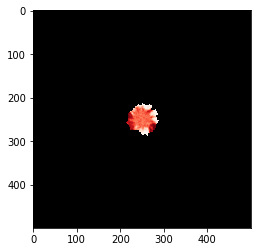

In [40]:
lattice2.return_colony_image()

In [46]:
image2 = lattice2.counts
image2[np.nonzero(image2)] = 1
perimeter2 = measure.perimeter(image2, neighborhood=8)
area2 = np.count_nonzero(lattice2.counts)

In [47]:
p2a2 = (perimeter2**2)/(4 * math.pi * area2)
p2a2

3.787952973476414